Test/Simu Track

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import sqlite3

In [ ]:
# Upload dataset into dataframe
df_track = pd.read_excel('/content/Feature_Track.xlsx')
df_simu = pd.read_excel('/content/Feature_Simulation.xlsx')
df_simu.head()

,Unnamed: 0,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,0,0AC2A4,1,13,1,0,0,1,0,0,...,0.12420,0.07737,0.12307,0.07681,0.05046,0.03492,0.07430,0.05289,0.03606,0.02393
1,1,0AC2A4,1,32,0,1,0,1,0,0,...,0.20402,0.10296,0.14606,0.10325,0.03636,0.02433,0.05822,0.04136,0.02535,0.01391
2,2,0AC2A4,1,36,0,0,1,1,0,0,...,0.20329,0.12355,0.09483,0.08173,0.04524,0.02847,0.06055,0.04321,0.03586,0.01923
3,3,0AC2A4,1,42,1,0,0,0,0,0,...,0.20325,0.12153,0.11255,0.10920,0.04928,0.02923,0.07192,0.04653,0.03536,0.01832
4,4,0AC2A4,1,52,1,0,0,0,0,1,...,0.19645,0.13454,0.13270,0.13759,0.04501,0.02943,0.06175,0.04715,0.03511,0.01838


In [ ]:
df_simu.describe()

,Unnamed: 0,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,643.000000,3.957265,78.383838,0.363636,0.181818,0.181818,0.545455,0.181818,0.051282,0.039627,...,0.132690,0.133176,0.098337,0.111562,0.046918,0.046526,0.062596,0.068699,0.037427,0.032896
std,371.669208,1.976662,49.905419,0.481233,0.385845,0.385845,0.498123,0.385845,0.220658,0.195157,...,0.133955,0.142587,0.087346,0.099366,0.043429,0.041800,0.050937,0.057056,0.040298,0.034472
min,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022810,0.026110,0.014190,0.020090,0.006700,0.008720,0.008800,0.013510,0.004520,0.005890
25%,321.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062290,0.063870,0.049475,0.055655,0.023905,0.024360,0.034465,0.037505,0.016640,0.015815
50%,643.000000,4.000000,74.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.088350,0.095480,0.073830,0.087570,0.033790,0.037170,0.049040,0.057020,0.025290,0.023780
75%,964.500000,6.000000,109.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.145420,0.139750,0.113975,0.123870,0.053905,0.050170,0.071040,0.073955,0.043715,0.036735
max,1286.000000,7.000000,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.022650,1.580330,1.295650,1.297160,0.460890,0.433110,0.545820,0.725710,0.480500,0.459800


In [ ]:
df_simu.columns

Index(['Unnamed: 0', 'subject', 'lap', 'start_time', 'straight',
       'roundabout_entry', 'roundabout_exit', 'zebra_crossing', 'left_turn',
       'u_turn', 'bypass_dummy', 'car', 'pedestrian', 'traffic_light',
       'narrow_road', 'dummy', 'bend', 'habituation', 'traffic', 'hurry',
       'frustration', 'surprise', 'risk_outcome', 'risk_source_env',
       'risk_source_other_usr', 'risk_source_driver', 'risk_source_crash',
       'risk_evaluation', 'violation_no', 'violation_roadside_invasion',
       'violation_give_the_way', 'violation_road_signs',
       'violation_heavy_braking', 'violation_roadside_exit',
       'violation_slowdown', 'emotion_na', 'emotion_neutral',
       'emotion_surprise', 'emotion_anger', 'emotion_boredom', 'emotion_fear',
       'emotion_fun', 'gaze_na', 'gaze_complete_expl', 'gaze_partial_expl',
       'gaze_poor_expl', 'distraction_na', 'distraction_no',
       'distraction_reduced_attention', 'distraction_speaking', 'max_speed',
       'avg_speed', 'st

### Vehicular Data

In [ ]:
vehicle_track = df_track[['subject', 'lap', 'start_time','max_speed','avg_speed', 'std_speed', 'yaw', 'yaw_rate', 'roll', 'roll_rate','pitch', 'pitch_rate', 'lat_acce', 'long_acce', 'vert_acce', 'avg_acce_pedal_pos', 'std_acce_pedal_pos', 'avg_steer_angle','std_steer_angle']]
vehicle_simu = df_simu[['subject', 'lap', 'start_time','max_speed','avg_speed', 'std_speed', 'yaw', 'yaw_rate', 'roll', 'roll_rate','pitch', 'pitch_rate', 'lat_acce', 'long_acce', 'vert_acce', 'avg_acce_pedal_pos', 'std_acce_pedal_pos', 'avg_steer_angle','std_steer_angle']]
vehicle_track.head()

,subject,lap,start_time,max_speed,avg_speed,std_speed,yaw,yaw_rate,roll,roll_rate,pitch,pitch_rate,lat_acce,long_acce,vert_acce,avg_acce_pedal_pos,std_acce_pedal_pos,avg_steer_angle,std_steer_angle
0,0AC2A4,1,7,9.70555,8.83906,0.72442,-0.00630,-0.00773,0.00790,0.12653,-0.00532,-0.08504,-0.17444,-0.00078,9.67688,12.38381,8.67537,0.07741,1.52931
1,0AC2A4,1,27,6.43056,4.88380,0.77016,0.02181,-0.01337,0.00919,0.16792,-0.00545,-0.05774,0.09127,-0.58403,9.70116,0.00000,0.00000,2.97287,105.15902
2,0AC2A4,1,33,5.13611,3.75038,0.46078,0.24420,0.02485,0.01137,0.09678,-0.00136,-0.11491,1.07801,-0.02341,9.69091,7.81937,5.49554,158.47021,214.39941
3,0AC2A4,1,43,8.44167,6.25133,0.73072,-0.03782,-0.05105,0.00615,0.11270,-0.00473,-0.12279,-0.07267,0.22717,9.66280,13.11911,9.18340,-18.71698,78.85933
4,0AC2A4,1,58,10.99444,5.74236,4.01025,0.06776,-0.00355,0.00896,0.09467,-0.00502,-0.07835,0.14797,-0.05067,9.68366,10.52989,15.64564,-0.00970,227.44937


In [ ]:
vehicle_track["dataset"] = "0"
vehicle_simu["dataset"] = "1"

<ipython-input-79-54e163291baf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_track["dataset"] = "0"
<ipython-input-79-54e163291baf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_simu["dataset"] = "1"


In [ ]:
vehicle = pd.concat([vehicle_track,vehicle_simu ], axis= 0)

In [ ]:
vehicle.reset_index(inplace=True)

In [ ]:
vehicle_simu.dtypes

subject                object
lap                     int64
start_time              int64
max_speed             float64
avg_speed             float64
std_speed             float64
yaw                   float64
yaw_rate              float64
roll                  float64
roll_rate             float64
pitch                 float64
pitch_rate            float64
lat_acce              float64
long_acce             float64
vert_acce             float64
avg_acce_pedal_pos    float64
std_acce_pedal_pos    float64
avg_steer_angle       float64
std_steer_angle       float64
dtype: object

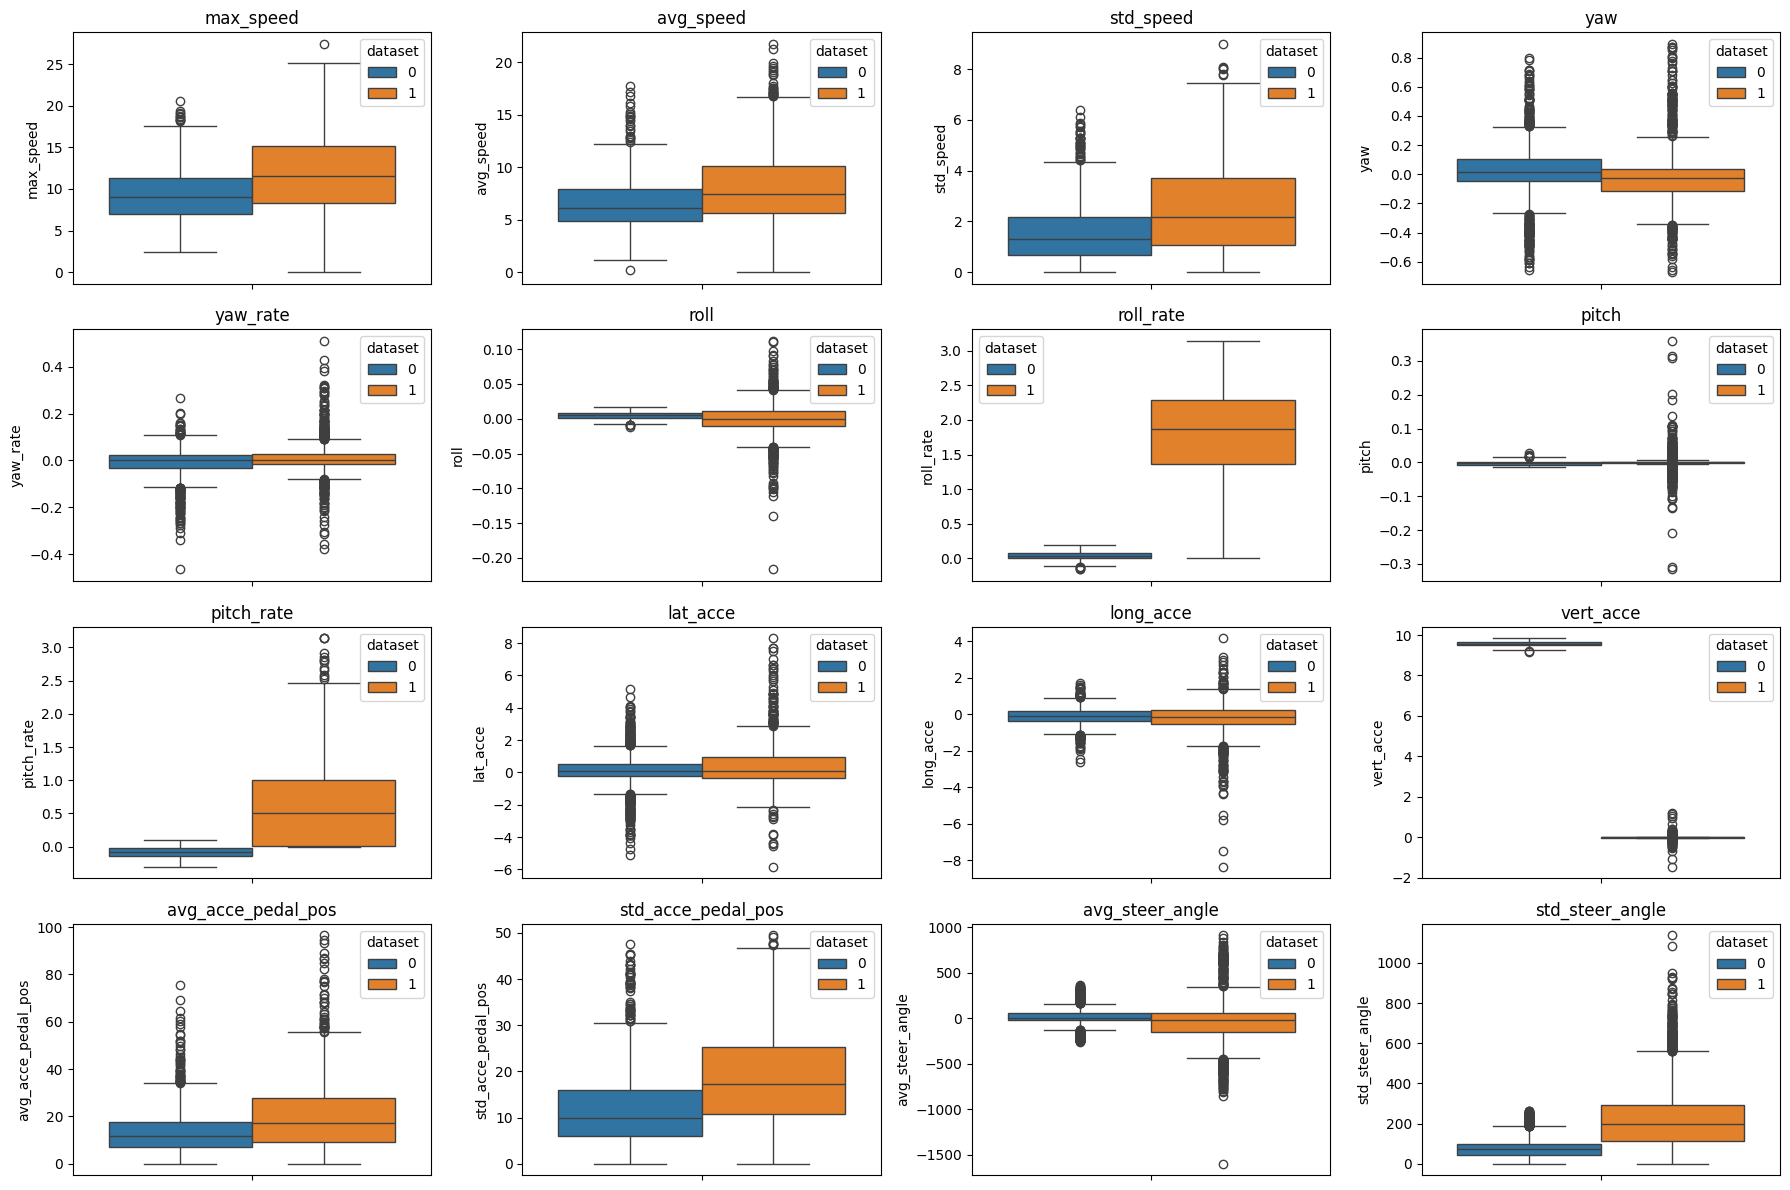

In [ ]:
features_to_test = ['max_speed','avg_speed', 'std_speed', 'yaw', 'yaw_rate', 'roll', 'roll_rate','pitch', 'pitch_rate', 'lat_acce', 'long_acce', 'vert_acce', 'avg_acce_pedal_pos', 'std_acce_pedal_pos', 'avg_steer_angle', 'std_steer_angle']

fig, axes = plt.subplots(4, 4, figsize=(18, 12))

# Iterate over selected features to create boxplots
for i, feature in enumerate(features_to_test, start=0):
    row = i // 4
    col = i % 4
    sns.boxplot(data=vehicle, hue="dataset", y=feature,
                ax=axes[row, col])
    # axes[row, col].set_xticks([0, 1])
    # axes[row, col].set_xticklabels(['Simulation', 'Track'])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()


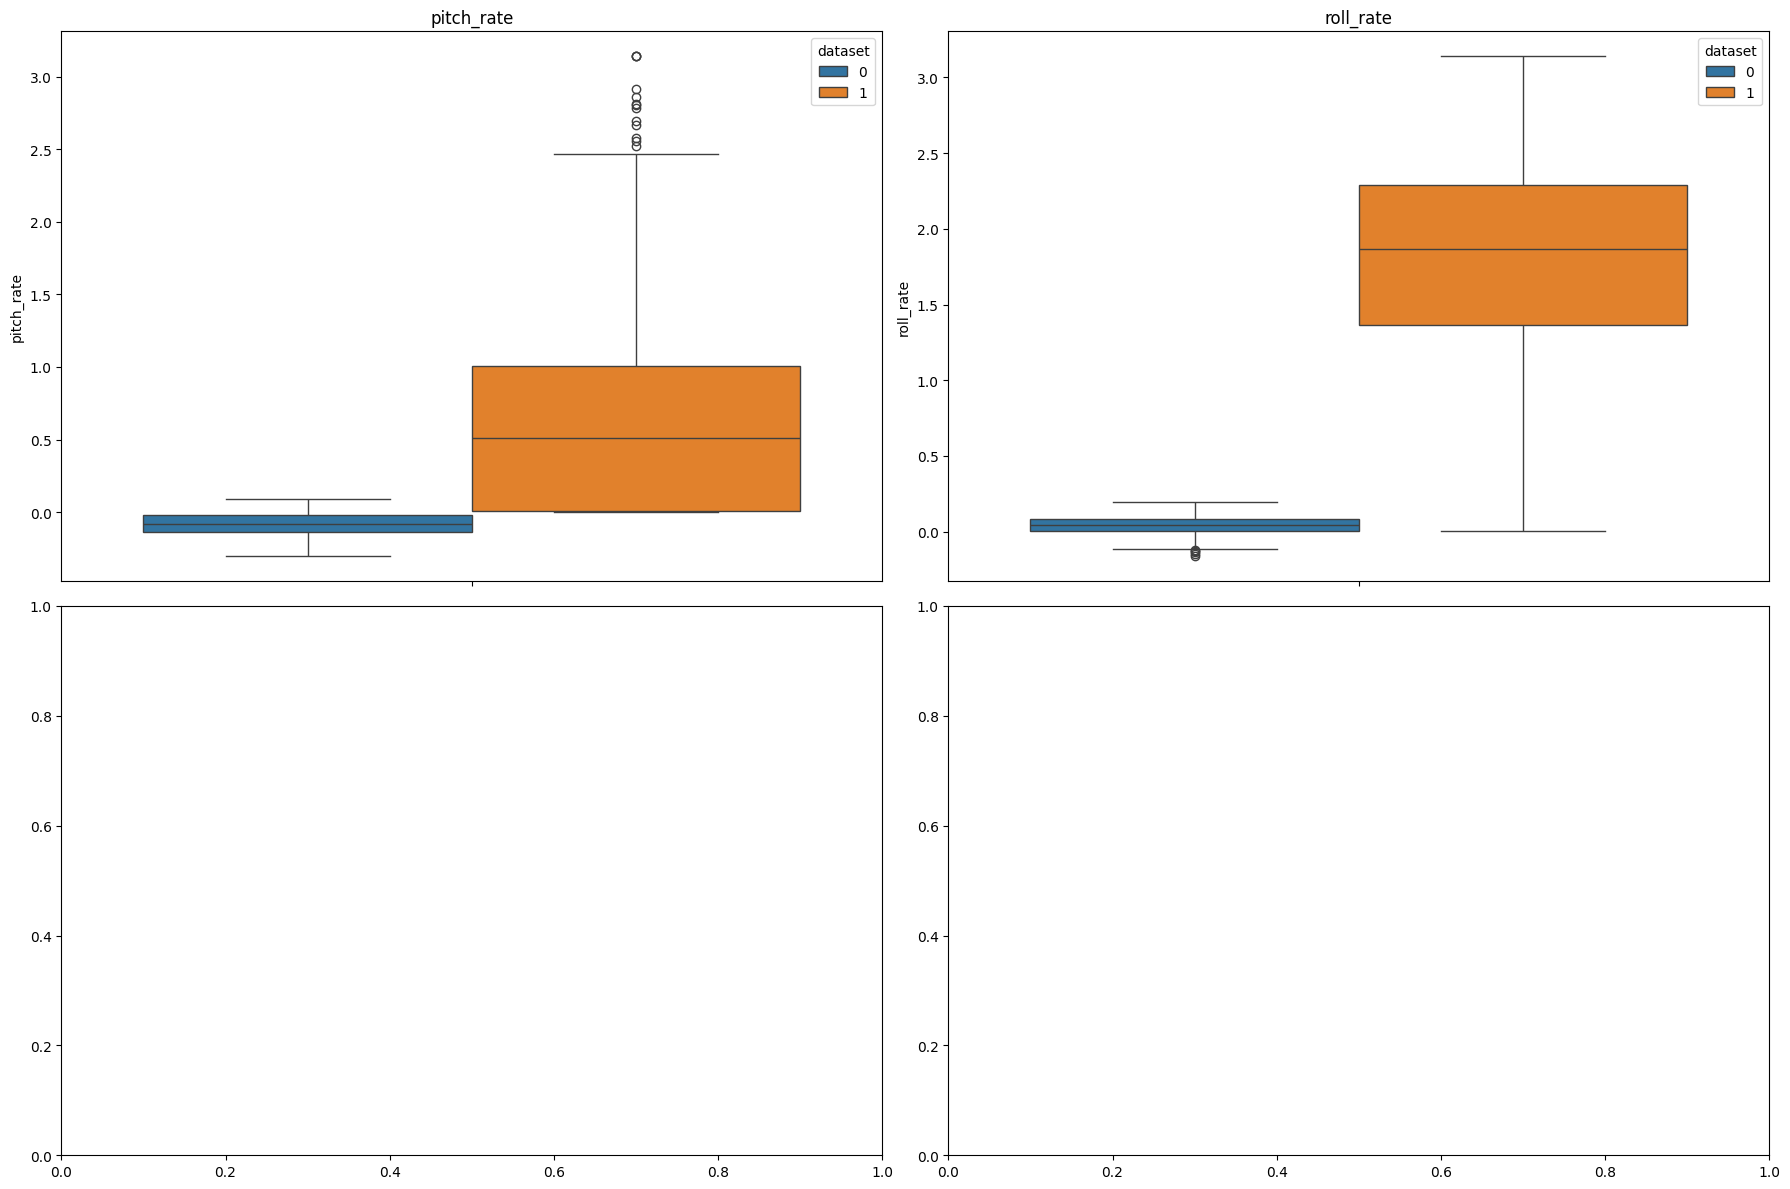

In [ ]:
features_to_test = ['pitch_rate','roll_rate']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Iterate over selected features to create boxplots
for i, feature in enumerate(features_to_test, start=0):
    row = i // 2
    col = i % 2
    sns.boxplot(data=vehicle, hue="dataset", y=feature,
                ax=axes[row, col])
    # axes[row, col].set_xticks([0, 1])
    # axes[row, col].set_xticklabels(['Simulation', 'Track'])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()


Berikut ini data yang isinya paling beda/beragam berdasarkan dua set of data

1. source environment
2. distraction reduce attention
3. gaze explanation

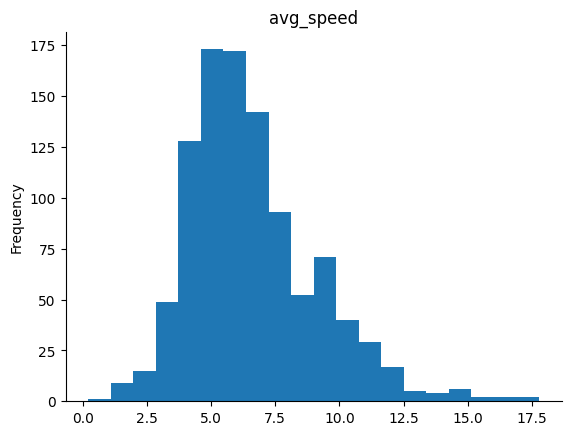

In [ ]:
# @title avg_speed

from matplotlib import pyplot as plt
vehicle['avg_speed'].plot(kind='hist', bins=20, title='avg_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

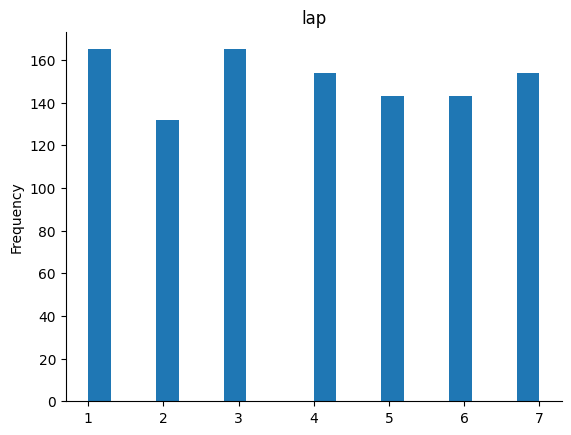

In [ ]:
# @title lap

from matplotlib import pyplot as plt
vehicle['lap'].plot(kind='hist', bins=20, title='lap')
plt.gca().spines[['top', 'right',]].set_visible(False)

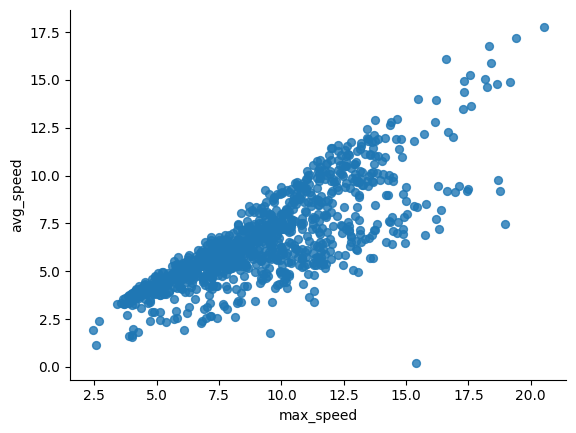

In [ ]:
# @title max_speed vs avg_speed

from matplotlib import pyplot as plt
vehicle.plot(kind='scatter', x='max_speed', y='avg_speed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Neurophysiological Data

In [ ]:
neuro_track = df_track[['hr', 'hrv_lf', 'hrv_hf', 'hrv_lfhf_ratio', 'gsr_tonic', 'gsr_phasic', 'gsr_peaks', 'EBRmean', 'BDmean', 'ThetaFrontal', 'ThetaParietal', 'AlphaFrontal', 'AlphaParietal','LowerAlphaFrontal', 'LowerAlphaParietal', 'UpperAlphaFrontal','UpperAlphaParietal', 'BetaFrontal', 'BetaParietal', 'LowerBetaFrontal','LowerBetaParietal', 'UpperBetaFrontal', 'UpperBetaParietal']]
neuro_simu = df_simu[['hr', 'hrv_lf', 'hrv_hf', 'hrv_lfhf_ratio', 'gsr_tonic', 'gsr_phasic', 'gsr_peaks', 'EBRmean', 'BDmean', 'ThetaFrontal', 'ThetaParietal', 'AlphaFrontal', 'AlphaParietal','LowerAlphaFrontal', 'LowerAlphaParietal', 'UpperAlphaFrontal','UpperAlphaParietal', 'BetaFrontal', 'BetaParietal', 'LowerBetaFrontal','LowerBetaParietal', 'UpperBetaFrontal', 'UpperBetaParietal']]
neuro_track.head()

,hr,hrv_lf,hrv_hf,hrv_lfhf_ratio,gsr_tonic,gsr_phasic,gsr_peaks,EBRmean,BDmean,ThetaFrontal,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,NaN,NaN,NaN,NaN,0.29638,0.00028,0.00000,NaN,NaN,0.21038,...,0.13222,0.08812,0.13469,0.08590,0.05499,0.04078,0.08419,0.06275,0.03722,0.02711
1,64.55194,0.03450,0.01650,2.11800,0.29524,0.00048,0.00001,12.00000,0.31999,0.14340,...,0.13639,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753
2,68.56082,0.04780,0.02840,2.22660,0.29477,0.00106,0.00003,8.80000,0.34538,0.16598,...,0.19671,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751
3,74.40222,0.04562,0.02500,1.91750,0.29425,0.00142,0.00003,7.50000,0.30734,0.18498,...,0.20826,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744
4,71.83749,0.04357,0.03171,1.53538,0.29106,0.00243,0.00005,6.72727,0.37574,0.17772,...,0.21193,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762


In [ ]:
neuro_track["dataset"] = "0"
neuro_simu["dataset"] = "1"

neuro = pd.concat([neuro_track,neuro_simu ], axis= 0)

neuro.reset_index(inplace=True)

<ipython-input-111-13557cfe3503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuro_track["dataset"] = "0"
<ipython-input-111-13557cfe3503>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuro_simu["dataset"] = "1"


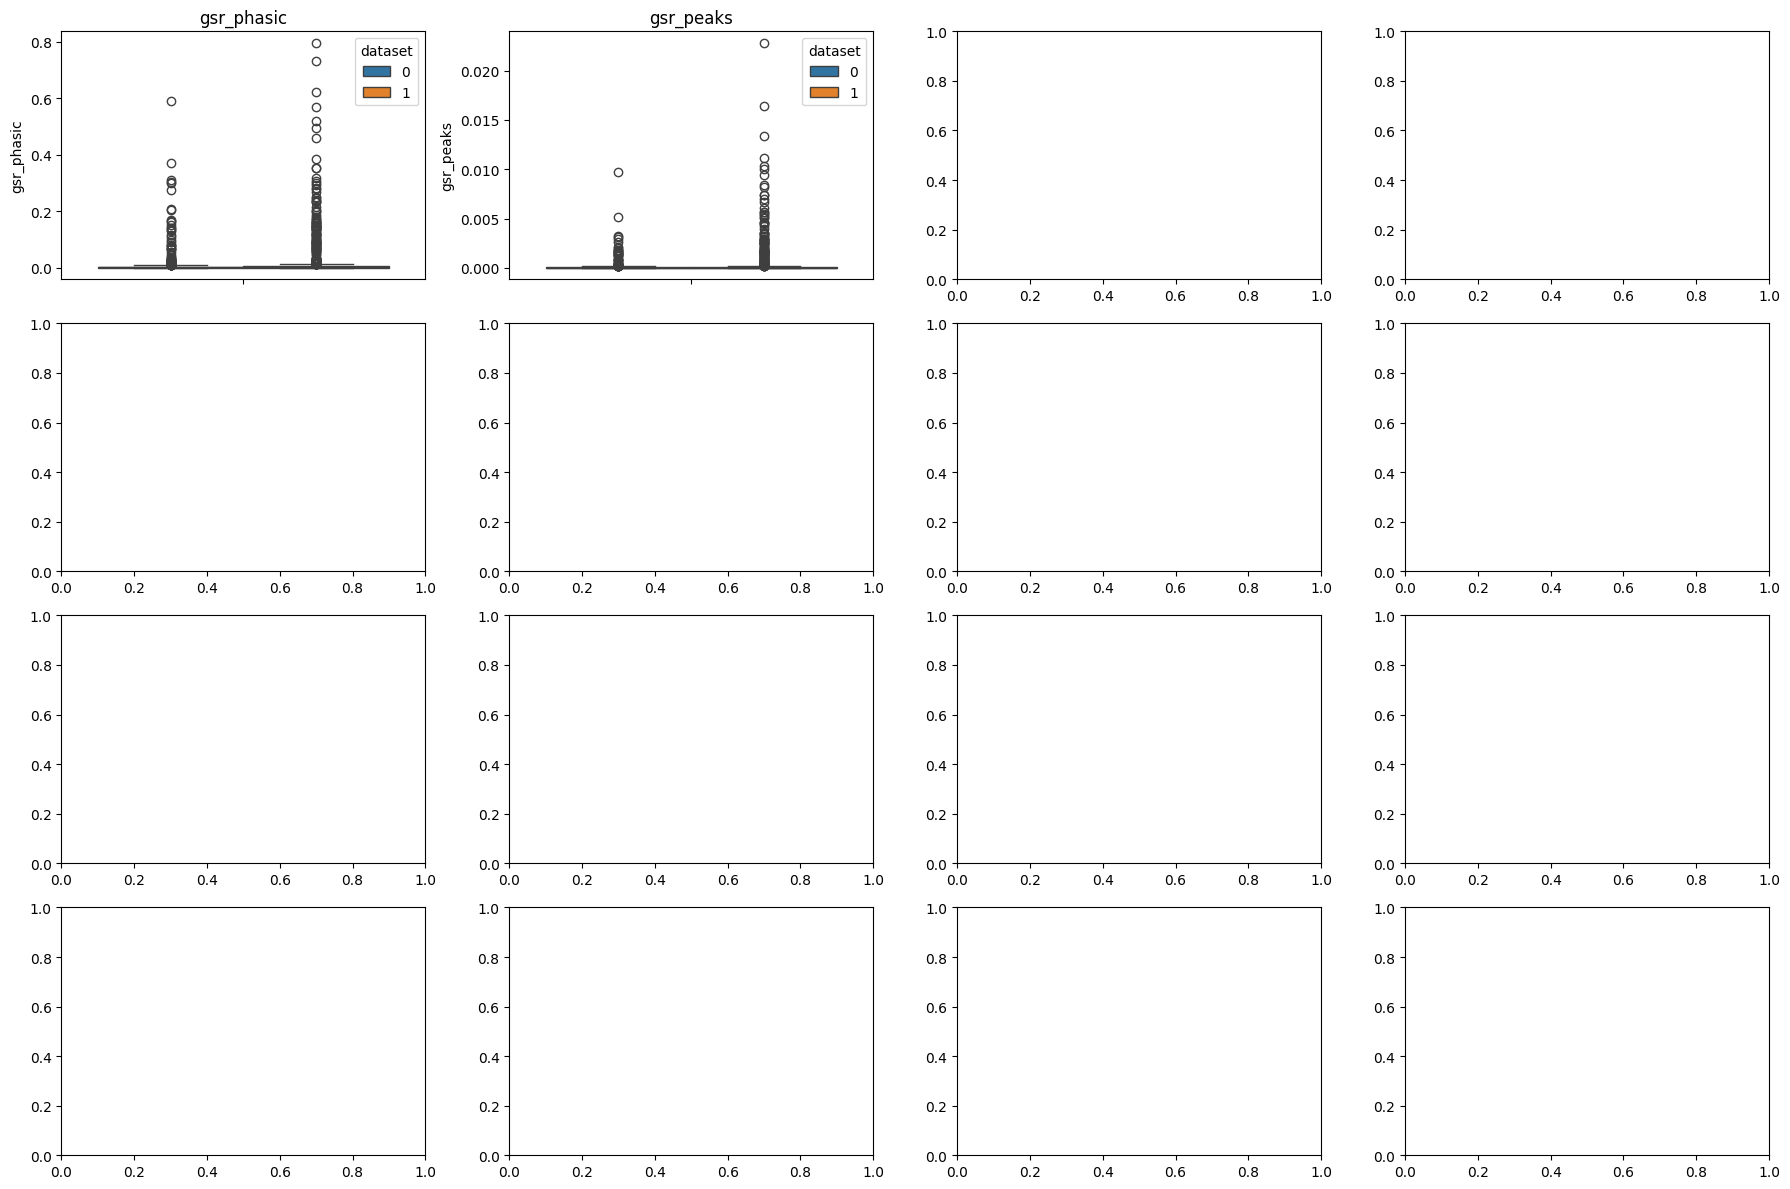

In [ ]:
features_to_test = ['gsr_phasic', 'gsr_peaks']

fig, axes = plt.subplots(4, 4, figsize=(18, 12))

# Iterate over selected features to create boxplots
for i, feature in enumerate(features_to_test, start=0):
    row = i // 4
    col = i % 4
    sns.boxplot(data=neuro, hue="dataset", y=feature,
                ax=axes[row, col])
    # axes[row, col].set_xticks([0, 1])
    # axes[row, col].set_xticklabels(['Simulation', 'Track'])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()



###Video Analysis Data

In [ ]:
video_track = df_track[['straight',
       'roundabout_entry', 'roundabout_exit', 'zebra_crossing', 'left_turn',
       'u_turn', 'bypass_dummy', 'car', 'pedestrian', 'traffic_light',
       'narrow_road', 'dummy', 'bend', 'habituation', 'traffic', 'hurry',
       'frustration', 'surprise', 'risk_outcome', 'risk_source_env',
       'risk_source_other_usr', 'risk_source_driver', 'risk_source_crash',
       'risk_evaluation', 'violation_no', 'violation_roadside_invasion',
       'violation_give_the_way', 'violation_road_signs',
       'violation_heavy_braking', 'violation_roadside_exit',
       'violation_slowdown', 'emotion_na', 'emotion_neutral',
       'emotion_surprise', 'emotion_anger', 'emotion_boredom', 'emotion_fear',
       'emotion_fun', 'gaze_na', 'gaze_complete_expl', 'gaze_partial_expl',
       'gaze_poor_expl', 'distraction_na', 'distraction_no',
       'distraction_reduced_attention', 'distraction_speaking']]

In [ ]:
video_simu = df_simu[['straight',
       'roundabout_entry', 'roundabout_exit', 'zebra_crossing', 'left_turn',
       'u_turn', 'bypass_dummy', 'car', 'pedestrian', 'traffic_light',
       'narrow_road', 'dummy', 'bend', 'habituation', 'traffic', 'hurry',
       'frustration', 'surprise', 'risk_outcome', 'risk_source_env',
       'risk_source_other_usr', 'risk_source_driver', 'risk_source_crash',
       'risk_evaluation', 'violation_no', 'violation_roadside_invasion',
       'violation_give_the_way', 'violation_road_signs',
       'violation_heavy_braking', 'violation_roadside_exit',
       'violation_slowdown', 'emotion_na', 'emotion_neutral',
       'emotion_surprise', 'emotion_anger', 'emotion_boredom', 'emotion_fear',
       'emotion_fun', 'gaze_na', 'gaze_complete_expl', 'gaze_partial_expl',
       'gaze_poor_expl', 'distraction_na', 'distraction_no',
       'distraction_reduced_attention', 'distraction_speaking']]
video_simu.head()

,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,car,pedestrian,traffic_light,...,emotion_fear,emotion_fun,gaze_na,gaze_complete_expl,gaze_partial_expl,gaze_poor_expl,distraction_na,distraction_no,distraction_reduced_attention,distraction_speaking
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
video_track["dataset"] = "0"
video_simu["dataset"] = "1"

video = pd.concat([video_track,video_simu ], axis= 0)

video.reset_index(inplace=True)

<ipython-input-89-6946de4f13ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_track["dataset"] = "0"
<ipython-input-89-6946de4f13ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_simu["dataset"] = "1"


In [ ]:

# x = venue_df['COUNT']
# y = venue_df['margin']
# fig = plt.figure(figsize = (10, 5))
# plt.scatter(x, y)
# plt.title("Correlation between margin and total order size")
# plt.xlabel("order size")
# plt.ylabel("margin")
# plt.show()

In [ ]:
features_to_test = []

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Iterate over selected features to create boxplots
for i, feature in enumerate(features_to_test, start=0):
    row = i // 3
    col = i % 3
    print(feature)
    sns.boxplot(data=[vehicle_simu[feature].dropna(), vehicle_track[feature].dropna()],
                notch=True,
                palette="Set2",
                width=0.5,
                ax=axes[row, col])
    axes[row, col].set_xticks([0, 1])
    axes[row, col].set_xticklabels(['Simulation', 'Track'])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

risk_evaluation
violation_no
violation_roadside_invasion
violation_give_the_way
violation_road_signs
violation_heavy_braking
violation_roadside_exit
violation_slowdown
emotion_na
emotion_neutral
emotion_surprise
emotion_anger
emotion_boredom
emotion_fear
emotion_fun
gaze_na
gaze_complete_expl
gaze_partial_expl
gaze_poor_expl
distraction_na
distraction_no
distraction_reduced_attention
distraction_speaking


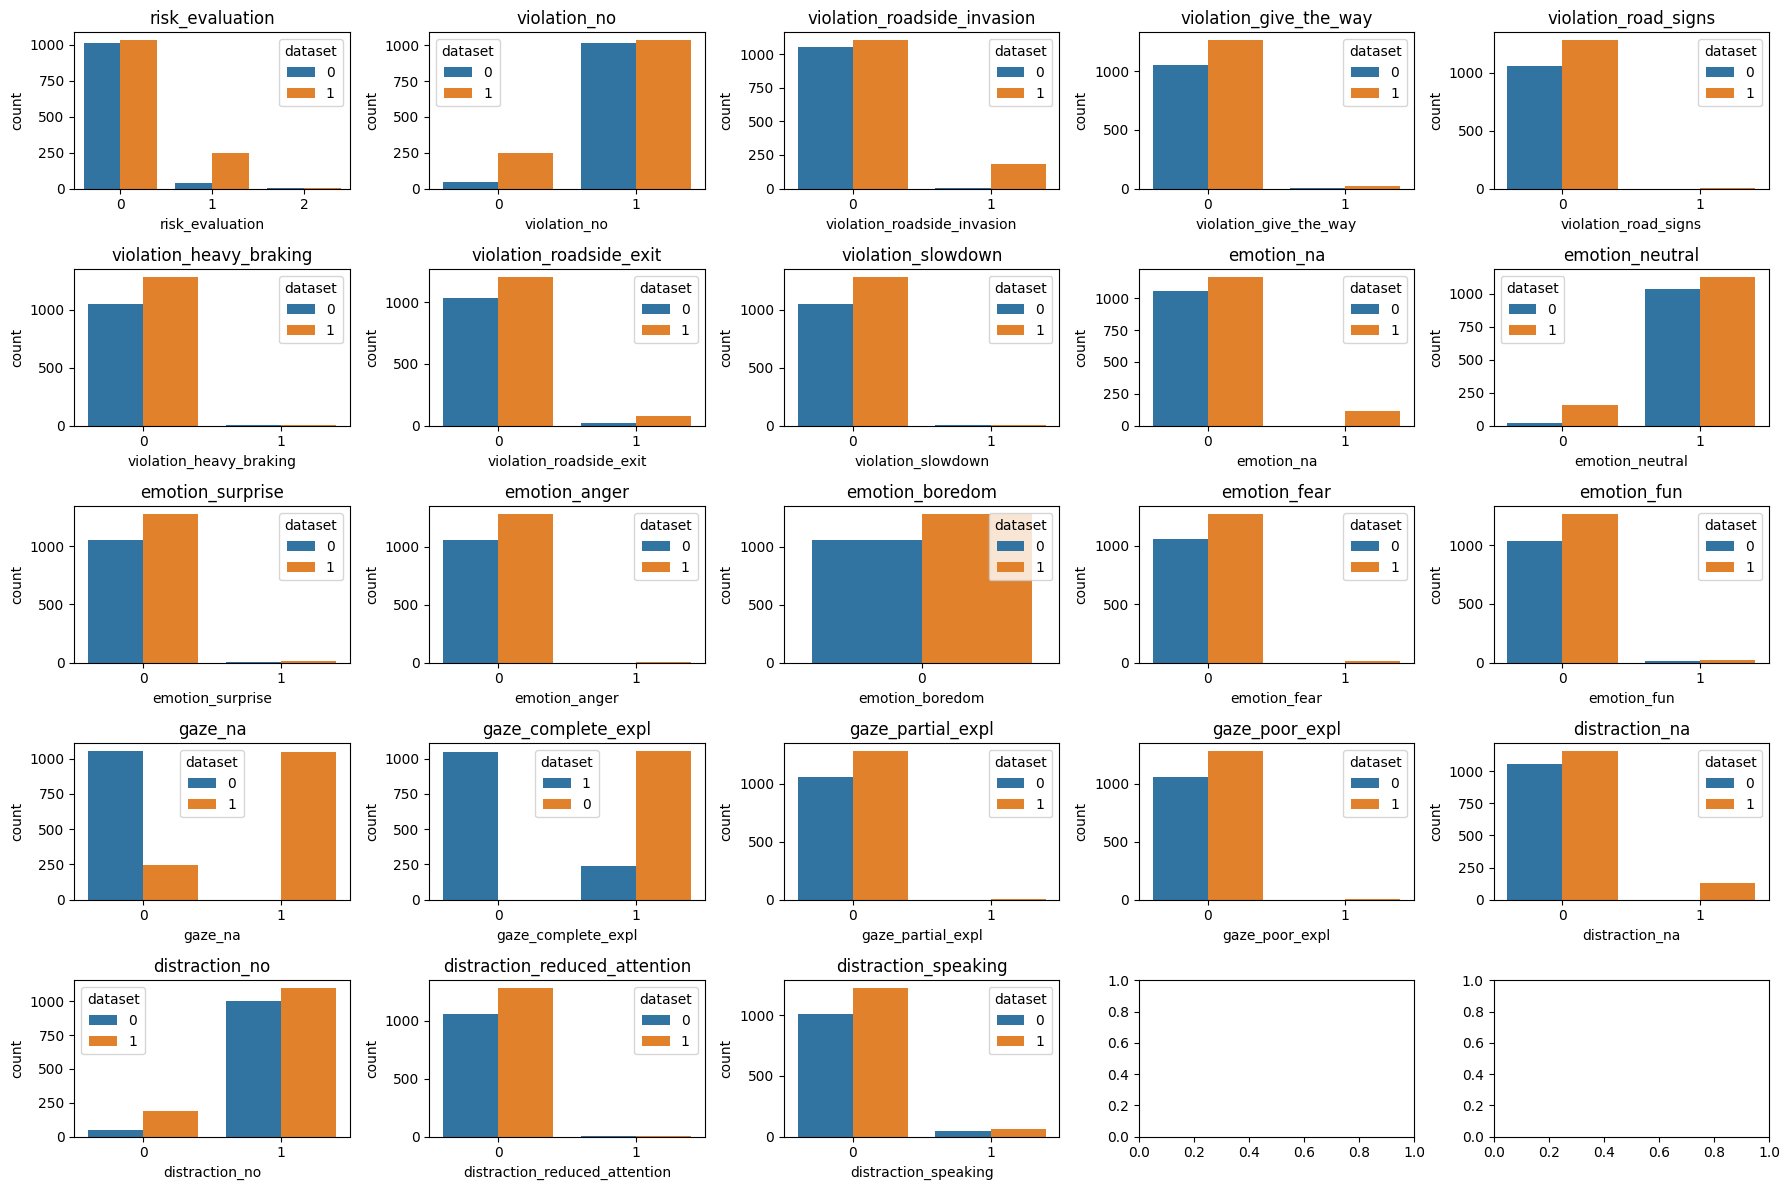

In [ ]:
features_to_test = ['risk_evaluation', 'violation_no', 'violation_roadside_invasion',
       'violation_give_the_way', 'violation_road_signs',
       'violation_heavy_braking', 'violation_roadside_exit',
       'violation_slowdown', 'emotion_na', 'emotion_neutral',
       'emotion_surprise', 'emotion_anger', 'emotion_boredom', 'emotion_fear',
       'emotion_fun', 'gaze_na', 'gaze_complete_expl', 'gaze_partial_expl',
       'gaze_poor_expl', 'distraction_na', 'distraction_no',
       'distraction_reduced_attention', 'distraction_speaking']


fig, axes = plt.subplots(5, 5, figsize=(18, 12))


# Iterate over selected features to create boxplots
for i, feature in enumerate(features_to_test, start=0):
    row = i // 5
    col = i % 5
    print(feature)
    sns.countplot(data=video[[feature, "dataset"]], x=feature, hue="dataset", ax=axes[row, col])
    # axes[row, col].set_xticks([0, 1])
    # axes[row, col].set_xticklabels(['Simulation', 'Track'])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()





IndexError: index 5 is out of bounds for axis 0 with size 5

## from GPT, to consider, need to read more


In [ ]:
correlation = df[['std_steer_angle', 'avg_steer_angle']].corr(method='pearson')
print(correlation)


                 std_steer_angle  avg_steer_angle
std_steer_angle         1.000000         0.401412
avg_steer_angle         0.401412         1.000000


In [ ]:
import scipy.stats

point_biserial_corr, p_value = scipy.stats.pointbiserialr(df['std_acce_pedal_pos'], df['lap'])
print("Point-biserial correlation coefficient:", point_biserial_corr)
print("P-value:", p_value)


Point-biserial correlation coefficient: 0.23742205851757994
P-value: 5.3575563792054176e-15


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('long_acce ~ lap', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


              sum_sq      df         F    PR(>F)
lap         0.073203     1.0  0.279663  0.597033
Residual  275.887655  1054.0       NaN       NaN


In [ ]:
from scipy.stats import ks_2samp

subject1_data = df[df['subject'] == '0AC2A4']['pitch']
subject2_data = df[df['subject'] == '13790E']['pitch']

statistic, p_value = ks_2samp(subject1_data, subject2_data)
print("Statistic:", statistic)
print("P-value:", p_value)


Statistic: 0.12727272727272726
P-value: 0.7695107143065164


In [ ]:
import scipy.stats

subject1_data = df[df['subject'] == '0AC2A4']['avg_speed']
subject2_data = df[df['subject'] == '13790E']['avg_speed']

t_statistic, p_value = scipy.stats.ttest_ind(subject1_data, subject2_data)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.9055286532193783
P-value: 0.05937042494659942
